# Processamento Inicial

### Importa bibliotecas

In [ ]:
import nltk
import pandas as pd
import os
import numpy as np
import string
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator
import matplotlib.cm as cm
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

### Define o diretório de trabalho

In [ ]:
#workdir_path = '/mnt/5bdd0b49-a2cd-495d-a27b-f4810abd97ca/home/osias/Projects/'+\
#'Processamento de linguagem natural/Trabalho BI 2019'
#os.chdir(workdir_path)

### Leitura da base de reclamações

In [ ]:
data = pd.read_csv('base reclamações.csv',encoding='windows-1252',sep =';')
# verificação visual das 5 primeiras linhas
data.head()

,Regiao,estado,empresa,subsidiaria,area,serviço,problema,faixa etarea
0,Sudeste,SP,ITAÚ UNIBANCO S/A,BANCO ITAÚ/BANCO UNIBANCO,"BANCOS MÚLTIPLOS, COM CARTEIRA COMERCIAL",Outros Contratos,"Contrato (não cumprimento, alteração, transfer...",entre 31 a 40 anos
1,Sudeste,SP,CLARO S/A,NET,NaN,Telefonia Fixa ( Plano de Expansão / Compra e ...,Contrato - Rescisão/alteração unilateral,mais de 70 anos
2,Sudeste,SP,ELETROPAULO METROPOLITANA ELETRICIDADE DE S PAULO,ELETROPAULO METROPOLITANA,DISTRIBUIÇÃO DE ENERGIA ELÉTRICA,Energia Elétrica,PID - Pedido de Indenização por Danos Morais,entre 31 a 40 anos
3,Sudeste,SP,GNN GARAGENS LTDA - EPP,NETPARK.COM.BR,ESTACIONAMENTO DE VEÍCULOS,"Estacionamento ( Particular, Supermercado, Sho...","Vicio de qualidade (mal executado, inadequado,...",entre 31 a 40 anos
4,Sudeste,SP,CLARO S/A,CLARO / NET / EMBRATEL / CLAROTV,TELEFONIA MÓVEL CELULAR,Telefonia Fixa ( Plano de Expansão / Compra e ...,"Vicio de qualidade (mal executado, inadequado,...",entre 41 a 50 anos


### Quantidade de linhas e de colunas do dataframe lido

In [ ]:
data.shape

(42307, 8)

### Colunas da tabela

In [ ]:
data.columns

Index(['Regiao ', 'estado', 'empresa', 'subsidiaria  ', 'area ', 'serviço',
       'problema', 'faixa etarea'],
      dtype='object')

### Localização das colunas com valores "null"

In [ ]:
data.isnull().sum()

Regiao              0
estado              0
empresa             1
subsidiaria      6530
area             5329
serviço             0
problema         8936
faixa etarea        0
dtype: int64

# Processo de criação da wordcloud para empresa

### Separação da coluna das empresas

In [ ]:
df_empresa = pd.DataFrame()
df_empresa['empresa'] = data['empresa']

### Verificação se há algum "null"

In [ ]:
df_empresa.isnull().sum()

empresa    1
dtype: int64

### Remoção dos "nulls" encontrados

In [ ]:
df_empresa.dropna(inplace=True)
df_empresa.isnull().sum()

empresa    0
dtype: int64

### Substitui:

#### " " por "_" (espaço)

#### "/" por "" 

#### "," por "" 

#### "(" por "" 

#### ")" por "" 

#### "-" por ""

#### "." por ""

#### "\t" por "" (tab)

### para o wordcloud funcionar

In [ ]:
dicionario = {' ':'_','/':'',',':'','\(':'','\)':'',"-":'','\.':'',r"^\t":''}
df_empresa["Nome Empresa Sem Espaço"] = df_empresa.replace({'empresa': dicionario},regex=True)

### Converte o nome das empresas para letras minúsculas

In [ ]:
df_empresa["Nome Empresa Sem Espaço"] = df_empresa["Nome Empresa Sem Espaço"].str.lower()

### Apreciação inicial do que foi obtido

In [ ]:
print (df_empresa.groupby("Nome Empresa Sem Espaço").size().sort_values(ascending=False))

Nome Empresa Sem Espaço
telefonica_brasil_sa                                  1150
claro_sa                                              1125
tim_celular_sa                                         786
via_varejo_sa                                          516
eletropaulo_metropolitana_eletricidade_de_s_paulo      480
                                                      ... 
mas_cobrança_e_reestruturaçao_de_ativos_financeiro       1
mas_informatica_ltda__contato_informática                1
mas_informatica_ltda__me                                 1
masima_incorporações_&_empreedimentos_ltda               1
123_viagem_de_turismo_ltda                               1
Length: 10607, dtype: int64


### Criação de uma string única com todas as ocorrências dos nomes das empresas

In [ ]:
string_empresas = " ".join([text for text in df_empresa["Nome Empresa Sem Espaço"]])

## Geração do wordcloud das 40 empresas mais reclamadas

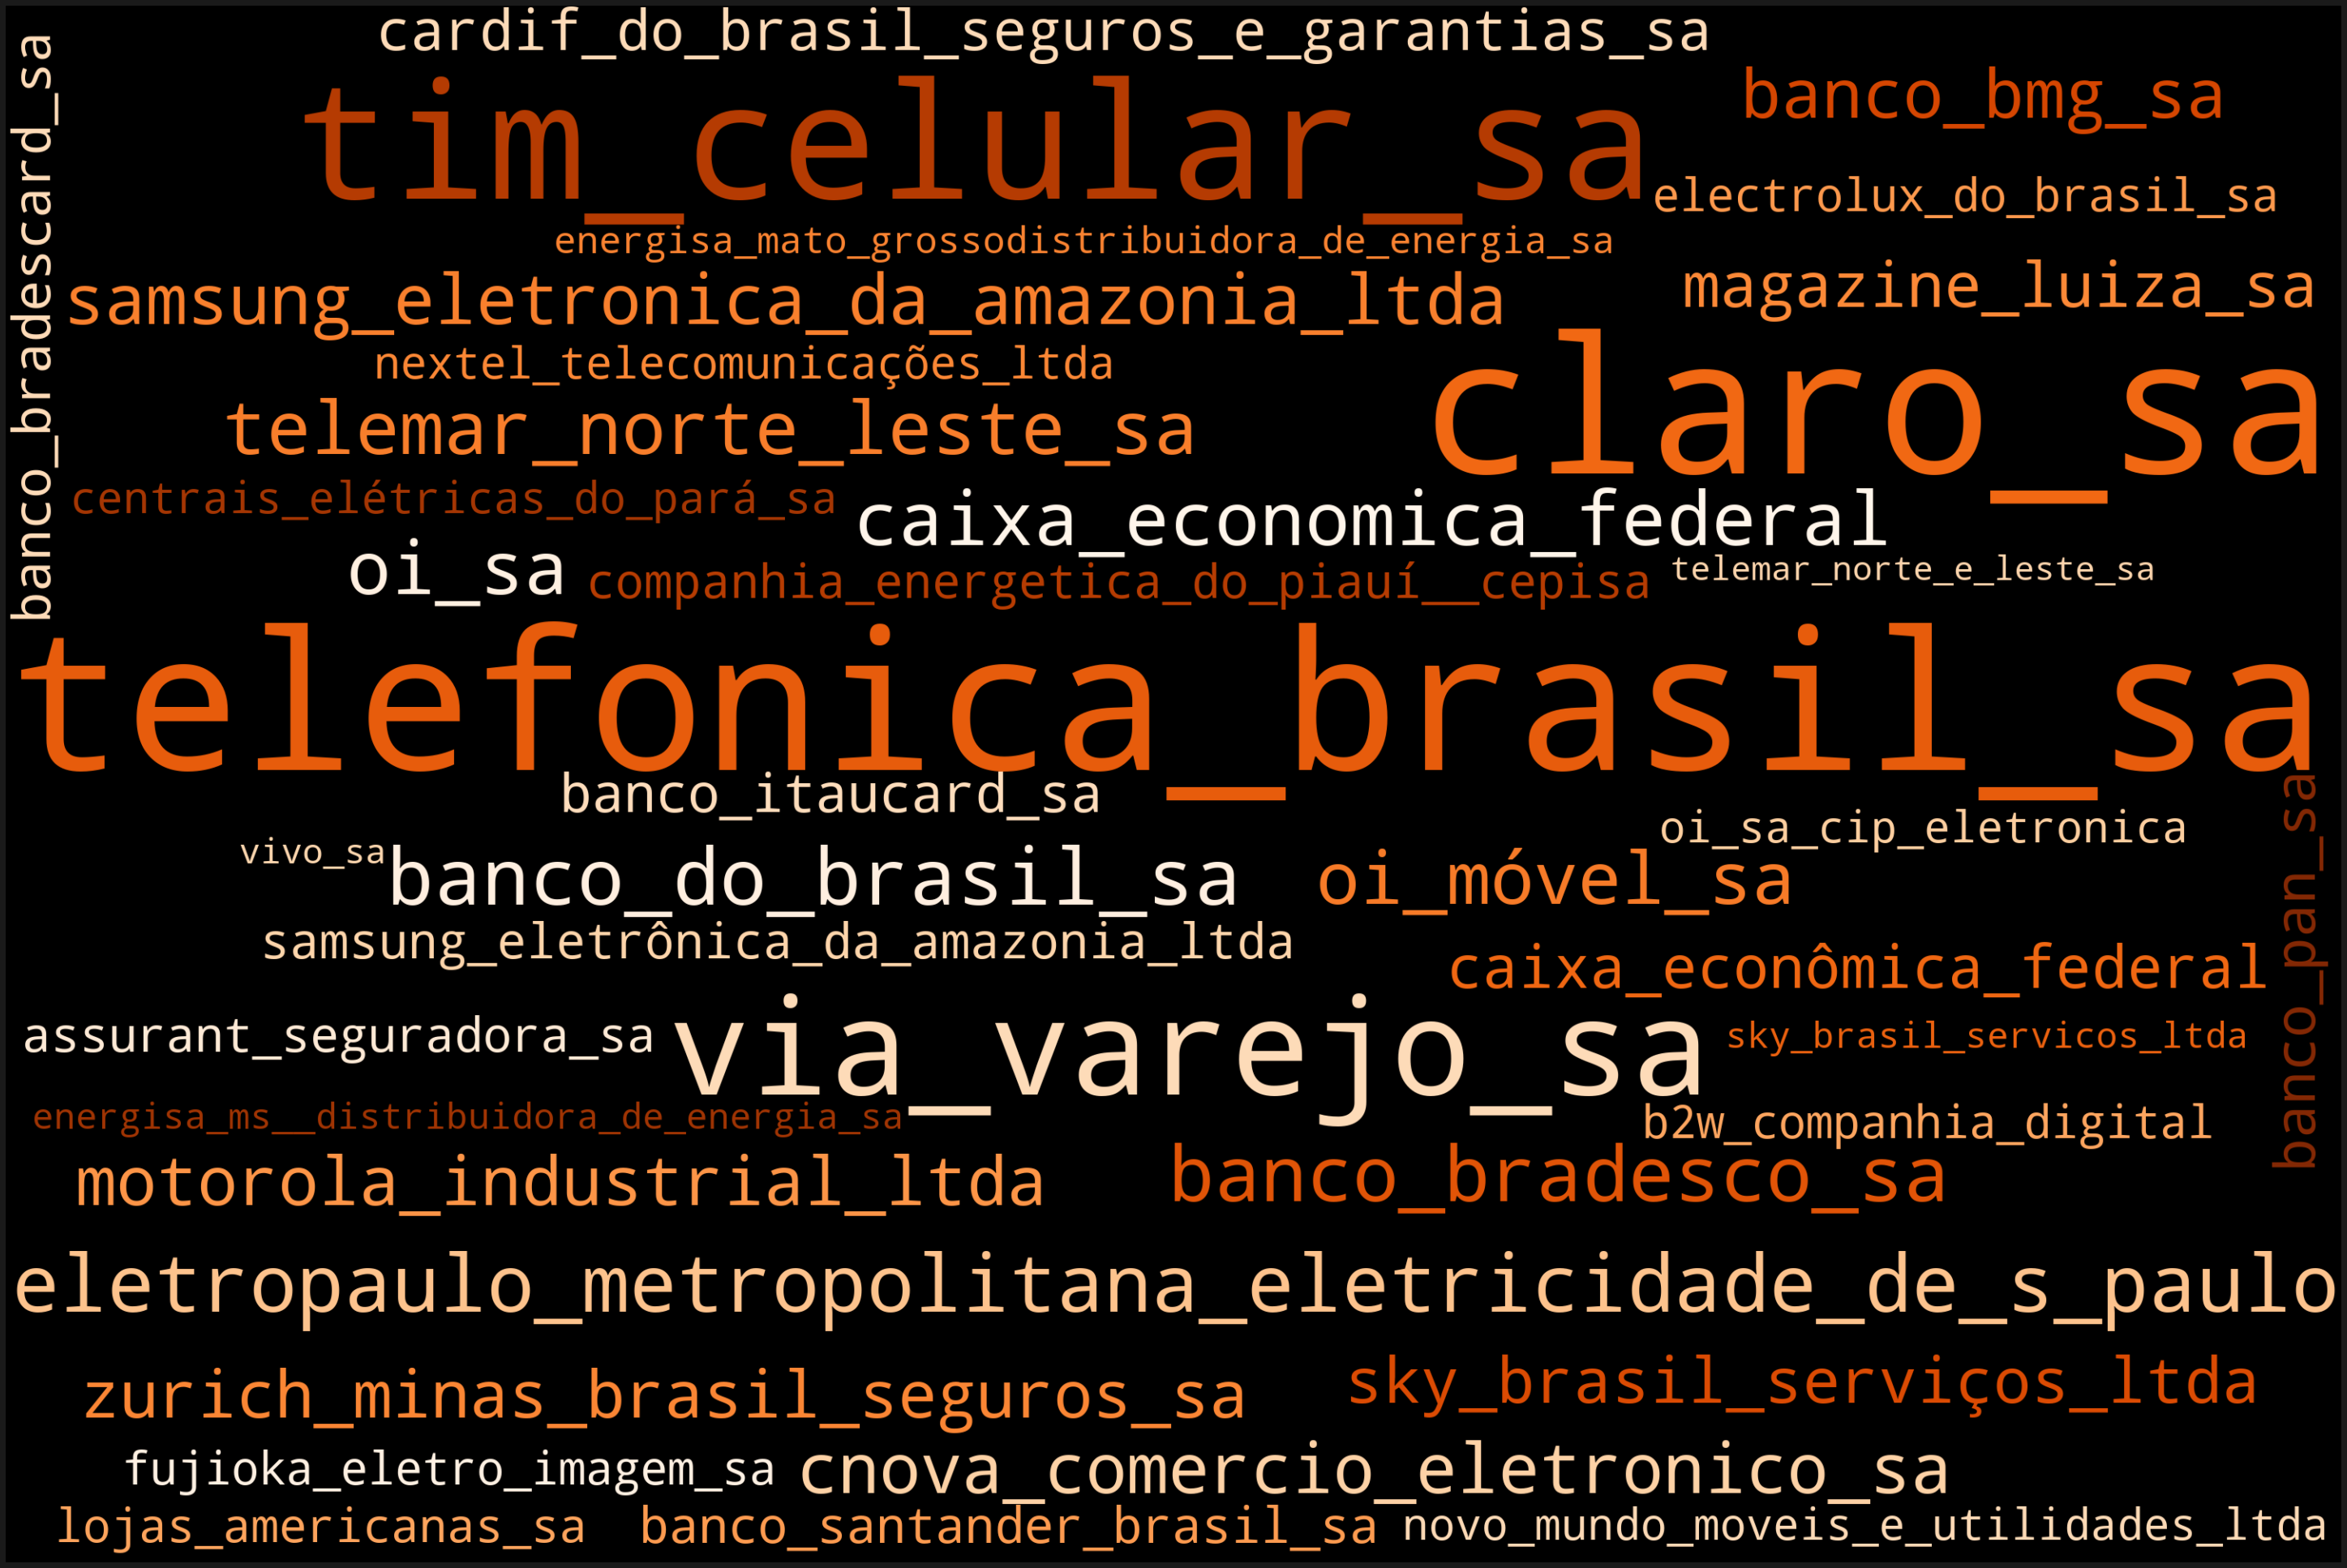

In [ ]:
wordcloud_empresas = WordCloud(background_color="black",collocations=False,
                              colormap="Oranges_r",
                              width = 3000,
                              height = 2000,
                              max_font_size=1000,
                              max_words=40
                             ).generate(string_empresas)
plt.figure(figsize = (40,30),
           facecolor = 'k',
           edgecolor = 'k')
plt.imshow(wordcloud_empresas, interpolation='bilinear')
plt.axis('off')
plt.tight_layout(pad=0)
plt.savefig("Empresa_wordcloud.png")
plt.show()

# Diagrama de barras ordenado pela quantidade decrescente de problemas, limitado aos 45 mais reclamados. 

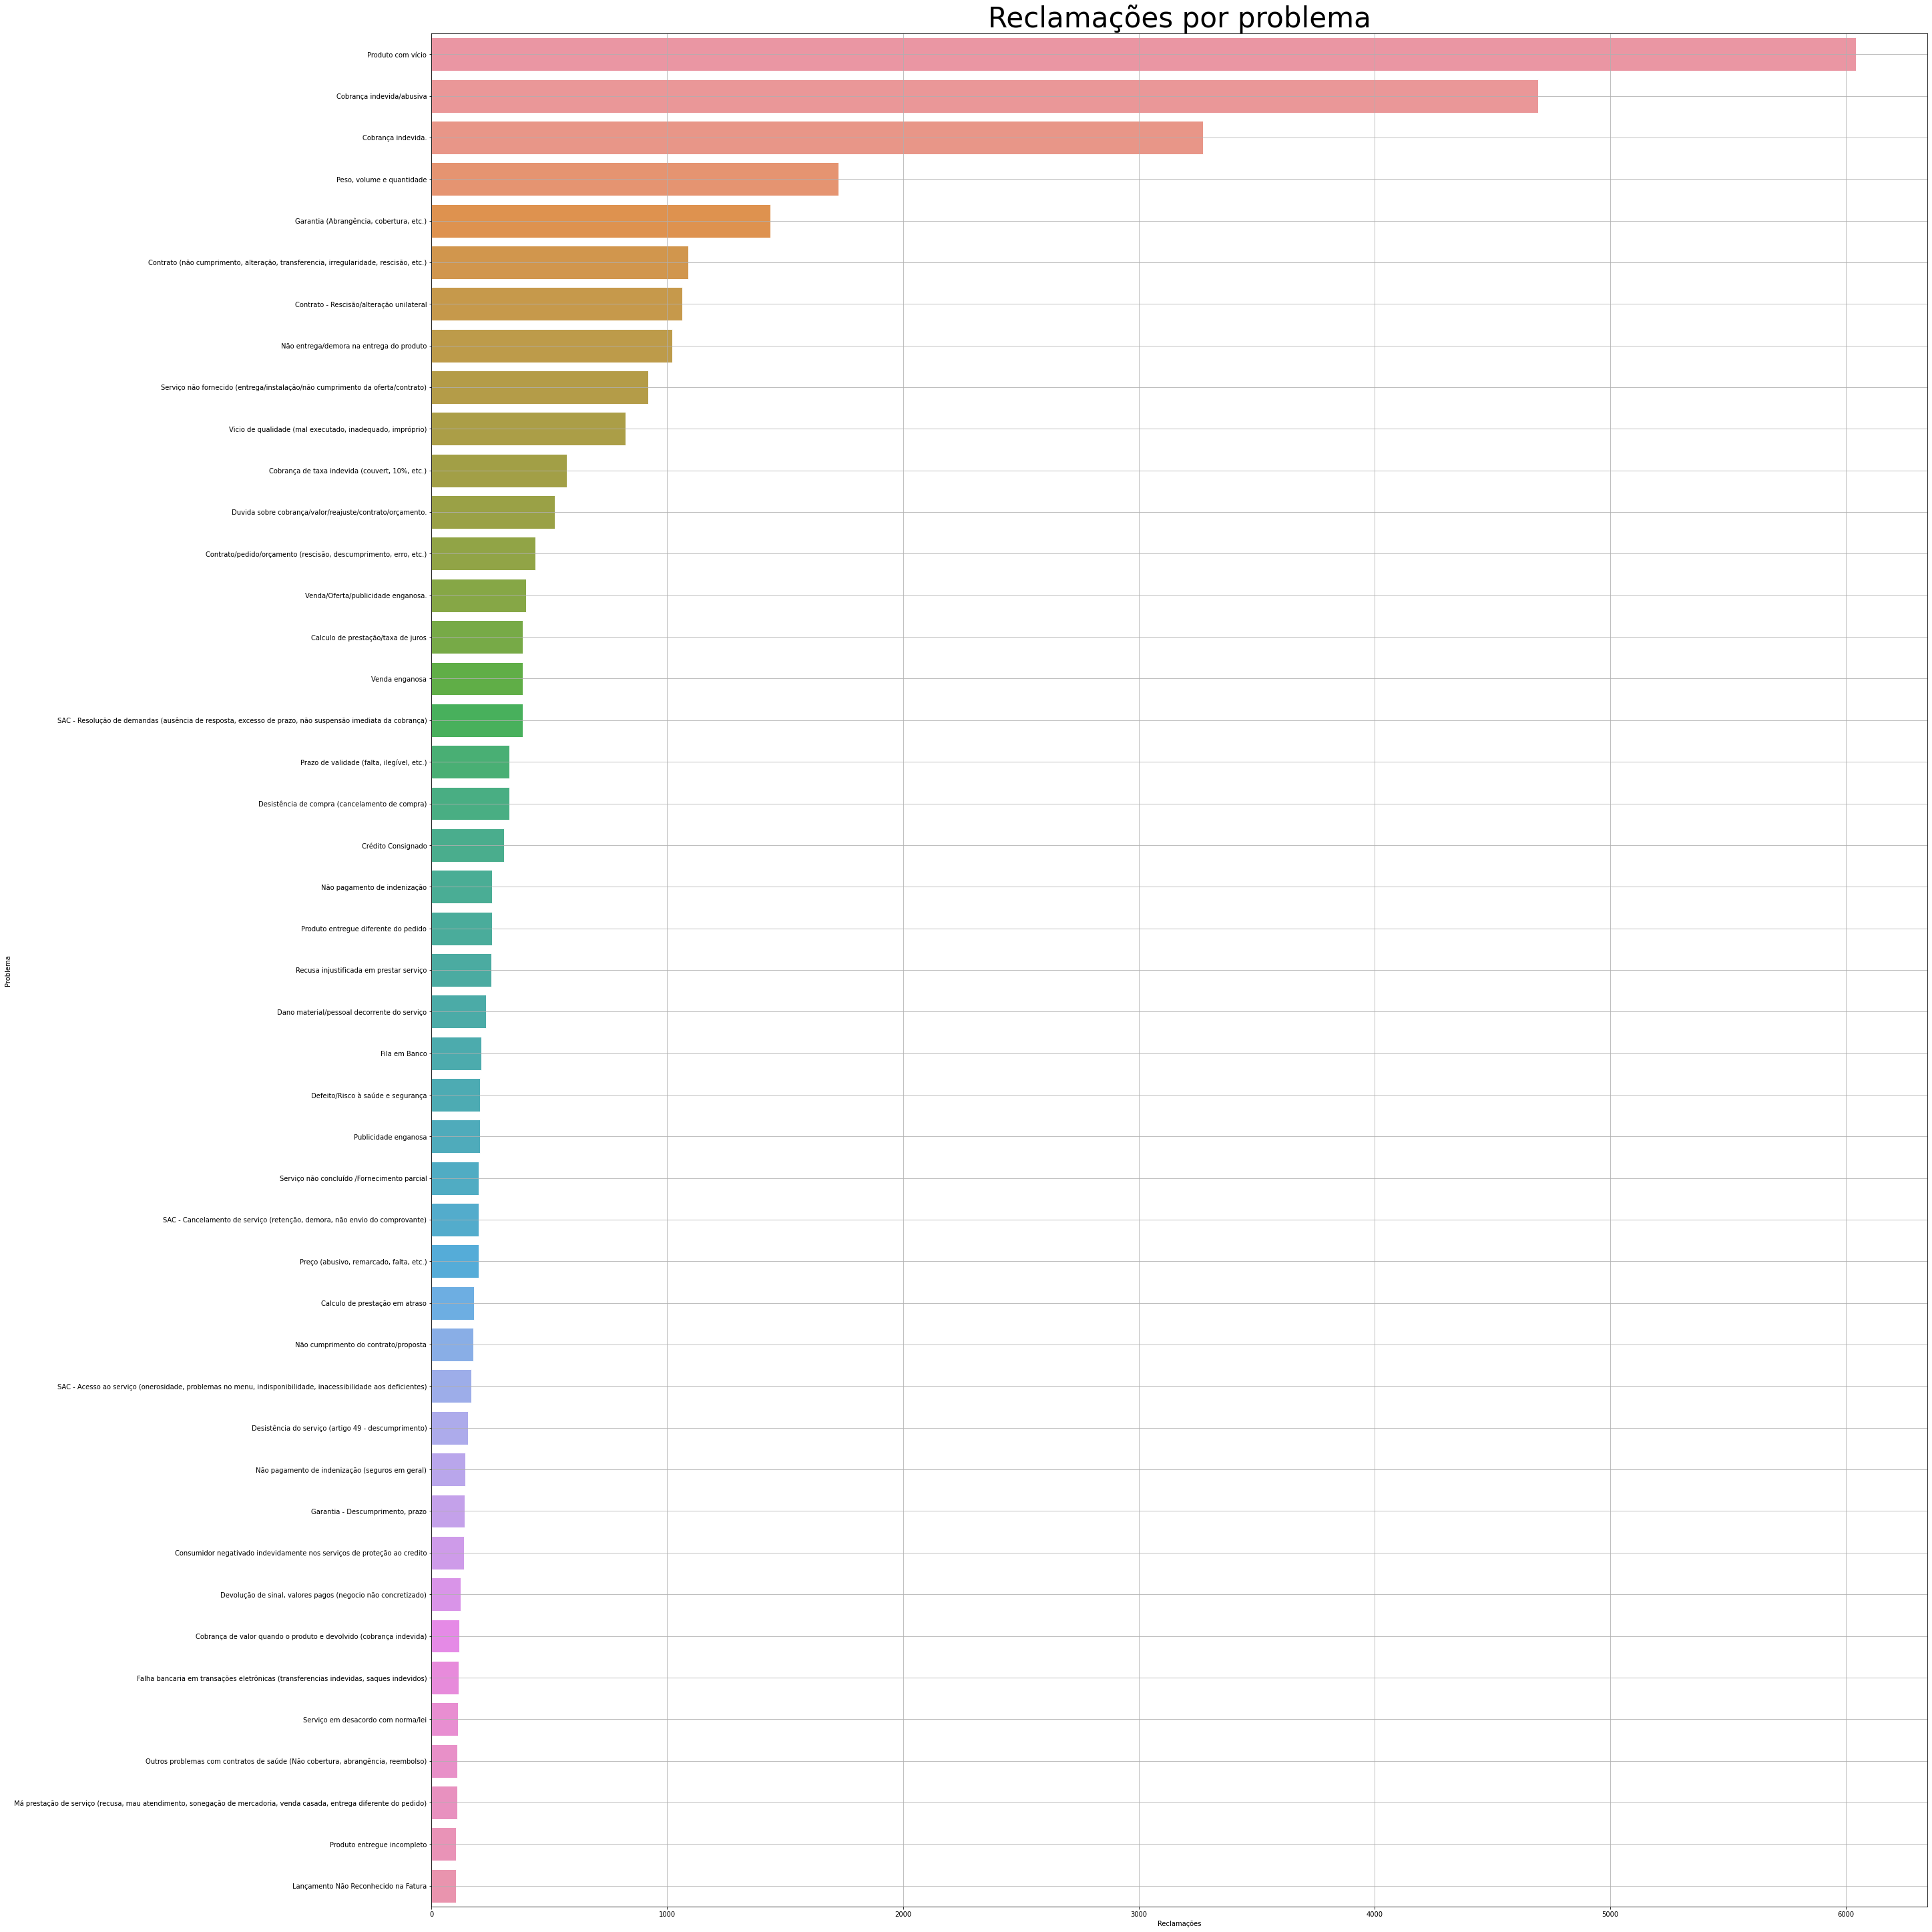

In [ ]:
df_problema = data
# Inicializa a figura do matplotlib
f, ax = plt.subplots(figsize=(40,40))
# Inicializa estilo do seaborn
sns.set(style="ticks",font_scale=3.5)
# carrega o dataset
sns.countplot(y = "problema", data=df_problema,order = df_problema["problema"].value_counts().index[:45])
ax.grid(True)
ax.set_title("Reclamações por problema")
ax.set_ylabel('Problema')
ax.set_xlabel('Reclamações')
plt.tight_layout(pad=0)
plt.savefig("Problema_barplot.png")
plt.show()

# Análise Top 10 - Empresas com mais reclamações

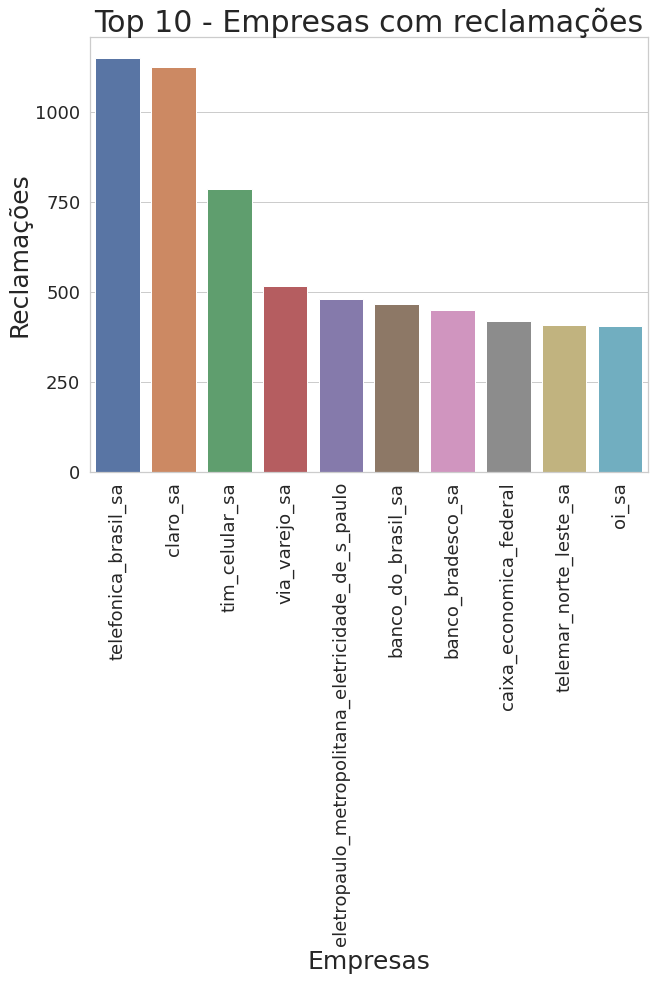

In [ ]:
#empresas com mais reclamações
sns.set_style('whitegrid')
plt.figure(figsize=(10,8))
sns.countplot(x=df_empresa["Nome Empresa Sem Espaço"], data=df_empresa,order = df_empresa["Nome Empresa Sem Espaço"].value_counts().index[:10])
plt.xlabel('Empresas',fontsize=25)
plt.ylabel('Reclamações', fontsize=25)
plt.xticks(rotation=90)
plt.xticks(fontsize=18)
plt.yticks(fontsize=18)
plt.title('Top 10 - Empresas com reclamações',fontsize=30)
plt.savefig("Rankingreclamacoes_barplot.png")
plt.show()


# Processo de criação da wordcloud para Estado.

In [ ]:
#Estado
#Separar colunas

df_estado = pd.DataFrame()
df_estado['estado'] = data['estado']




In [ ]:
#checar nulo
df_estado.isnull().sum()

estado    0
dtype: int64

In [ ]:
print (df_estado.groupby("estado").size().sort_values(ascending=False))

estado
SP    8127
GO    7764
MS    4723
RN    4073
MT    3972
MG    3460
PI    2153
RO    2057
SC    1955
CE    1766
ES     828
TO     567
PA     341
PB     302
MA     126
RS      90
PE       3
dtype: int64


In [ ]:
#string unica
string_estado = " ".join([text for text in df_estado["estado"]])

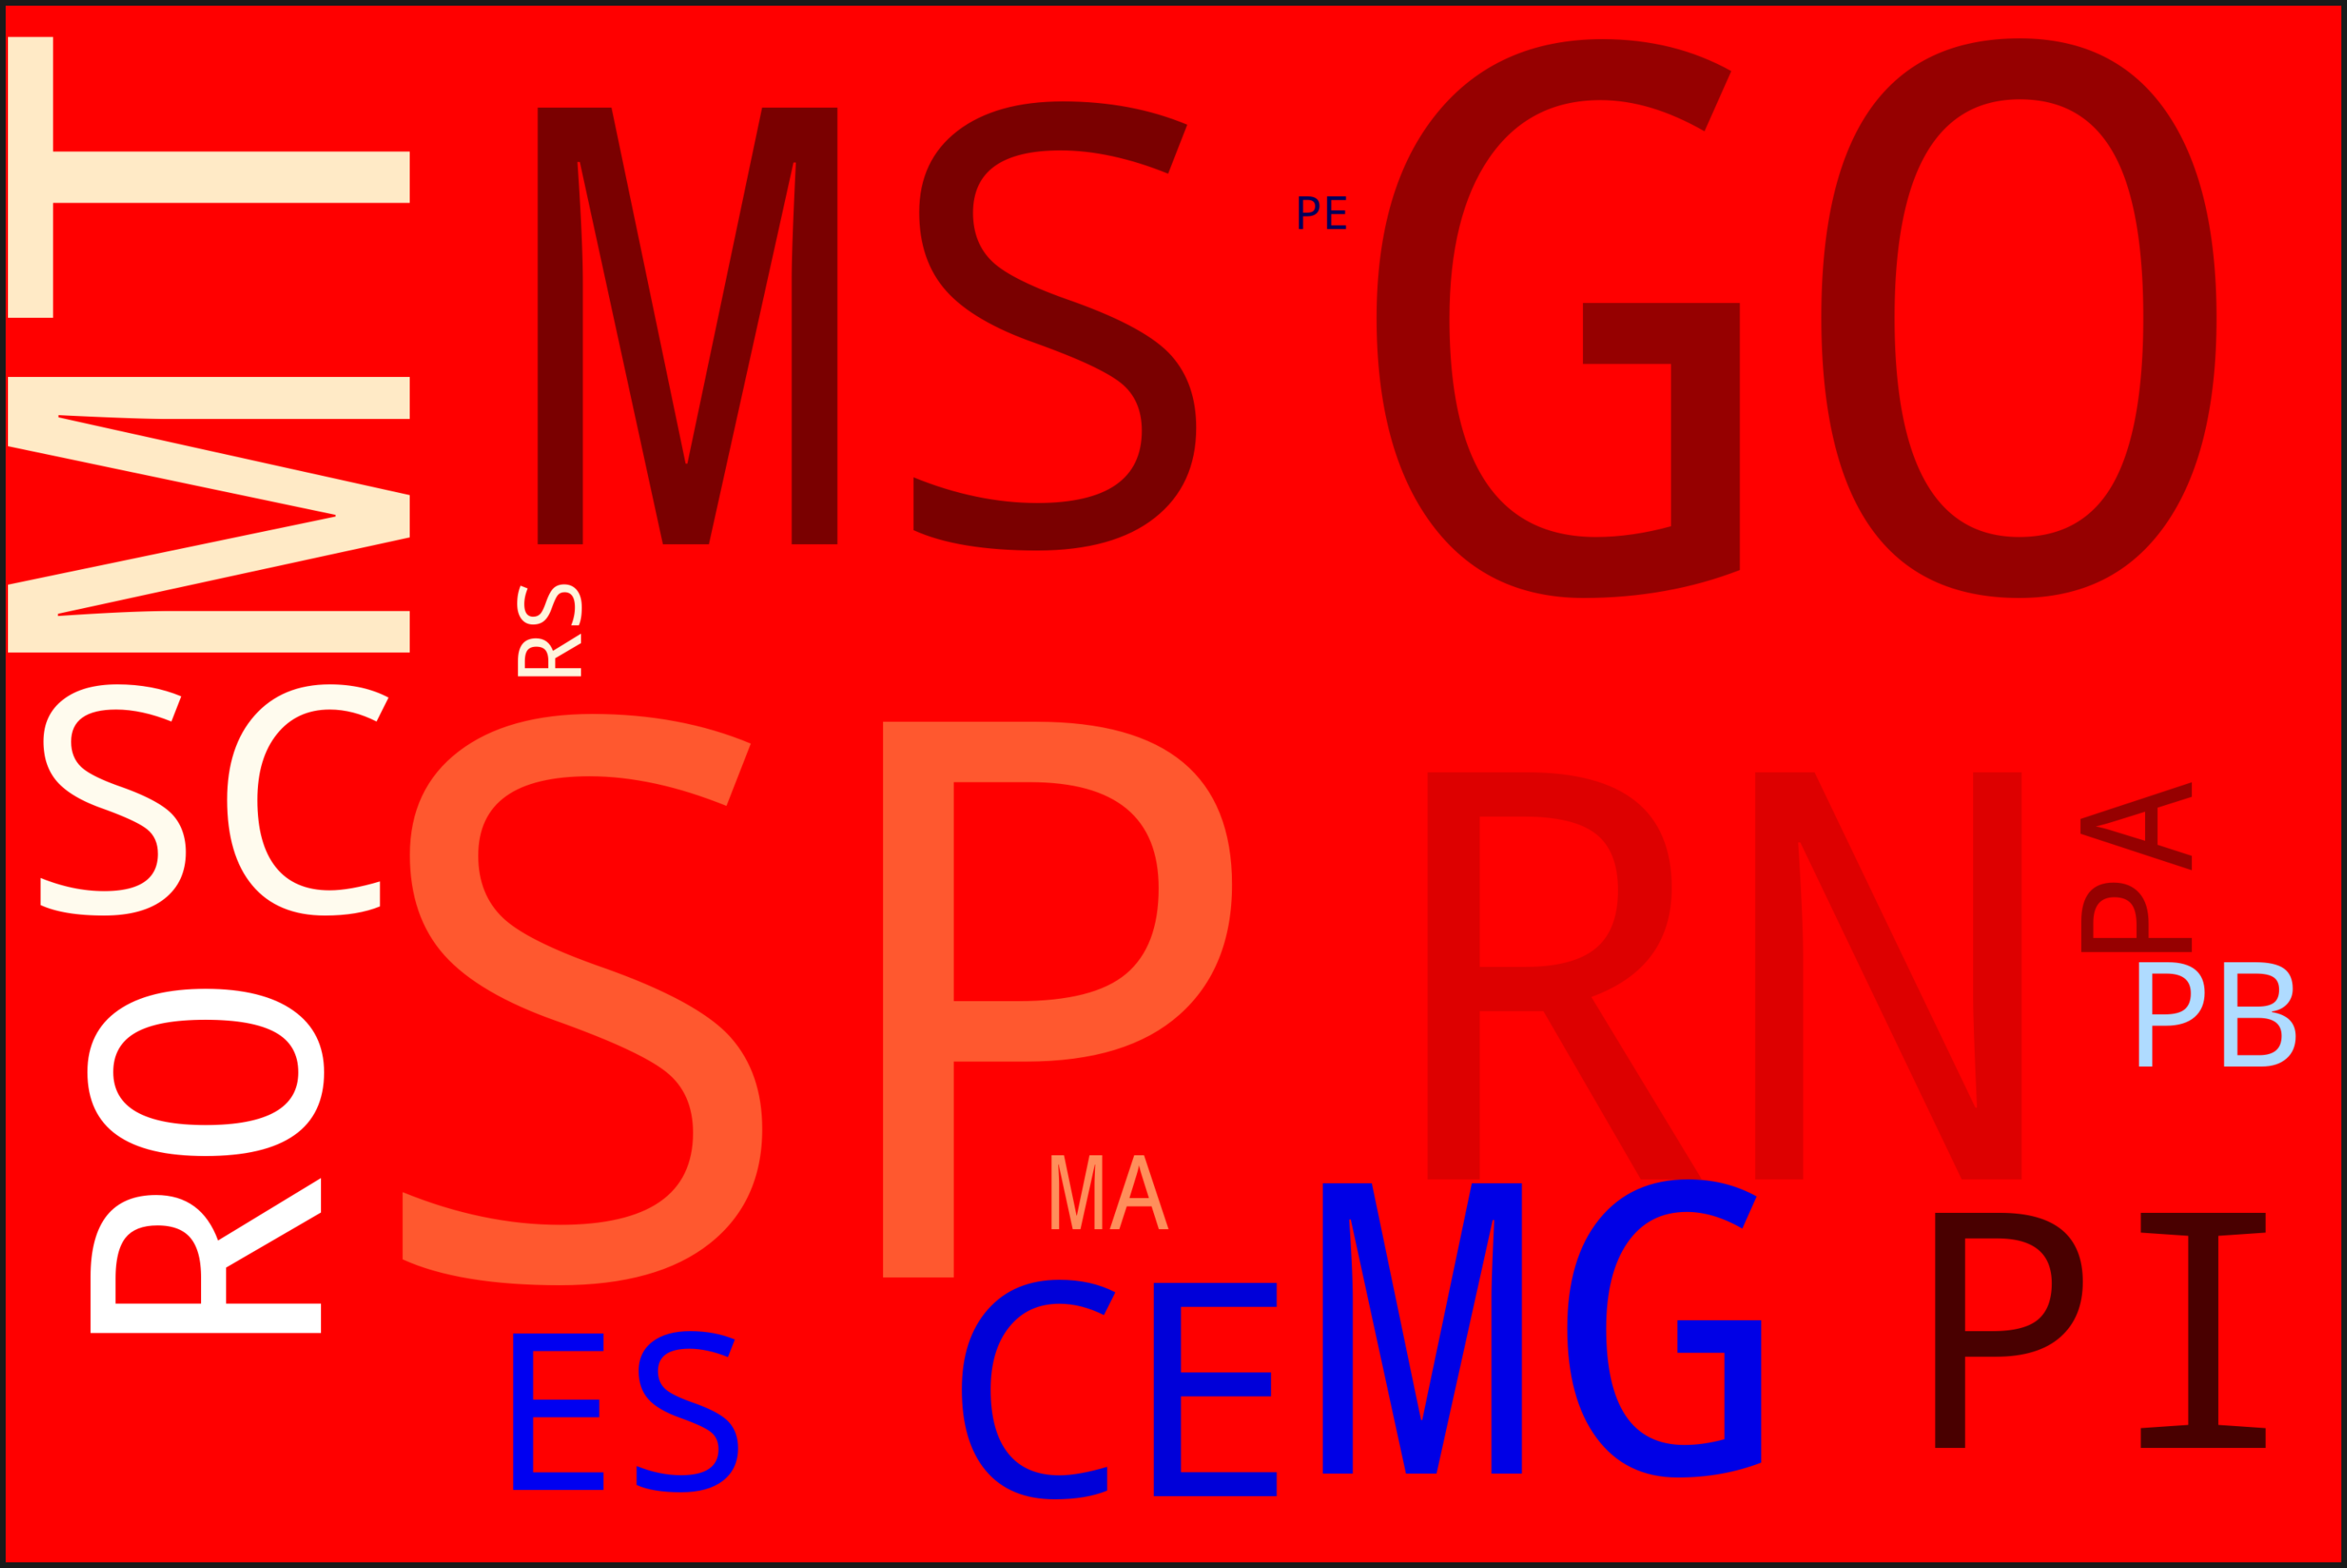

In [ ]:
wordcloud_estado = WordCloud(background_color="red",collocations=False,
                              colormap="flag",
                              width = 3000,
                              height = 2000,
                              max_font_size=1000,
                              max_words=40
                             ).generate(string_estado)
plt.figure(figsize = (40,30),
           facecolor = 'k',
           edgecolor = 'k')
plt.imshow(wordcloud_estado, interpolation='bilinear')
plt.axis('off')
plt.tight_layout(pad=0)
plt.savefig("estado_wordcloud.png")
plt.show()

# Processo de criação da wordcloud para Serviço

In [ ]:
#serviço
df_servico = pd.DataFrame()
df_servico['servico'] = data['serviço']


In [ ]:
df_servico.isnull().sum()

servico    0
dtype: int64

In [ ]:
dicionario = {' ':'_','/':'',',':'','\(':'','\)':'',"-":'','\.':'',r"^\t":''}
df_servico["servico"] = df_servico.replace({'servico': dicionario},regex=True)

In [ ]:
df_servico["servico"] = df_servico["servico"].str.lower()

In [ ]:
print (df_servico.groupby("servico").size().sort_values(ascending=False))

servico
telefone__convencional_celular_interfone_etc_                  5149
telefonia_celular                                              3037
telefonia_fixa__plano_de_expansão__compra_e_venda__locação_    2713
banco_comercial                                                2313
cartão_de_crédito                                              2274
                                                               ... 
charutaria__cigarro_tabaco_cachimbo_etc_                          1
embalagem                                                         1
farináceos_fubá_polvilho_etc                                      1
profissional_liberal__veterinário                                 1
radiochamada__pager                                               1
Length: 193, dtype: int64


In [ ]:
#string unica
string_servico = " ".join([text for text in df_servico["servico"]])

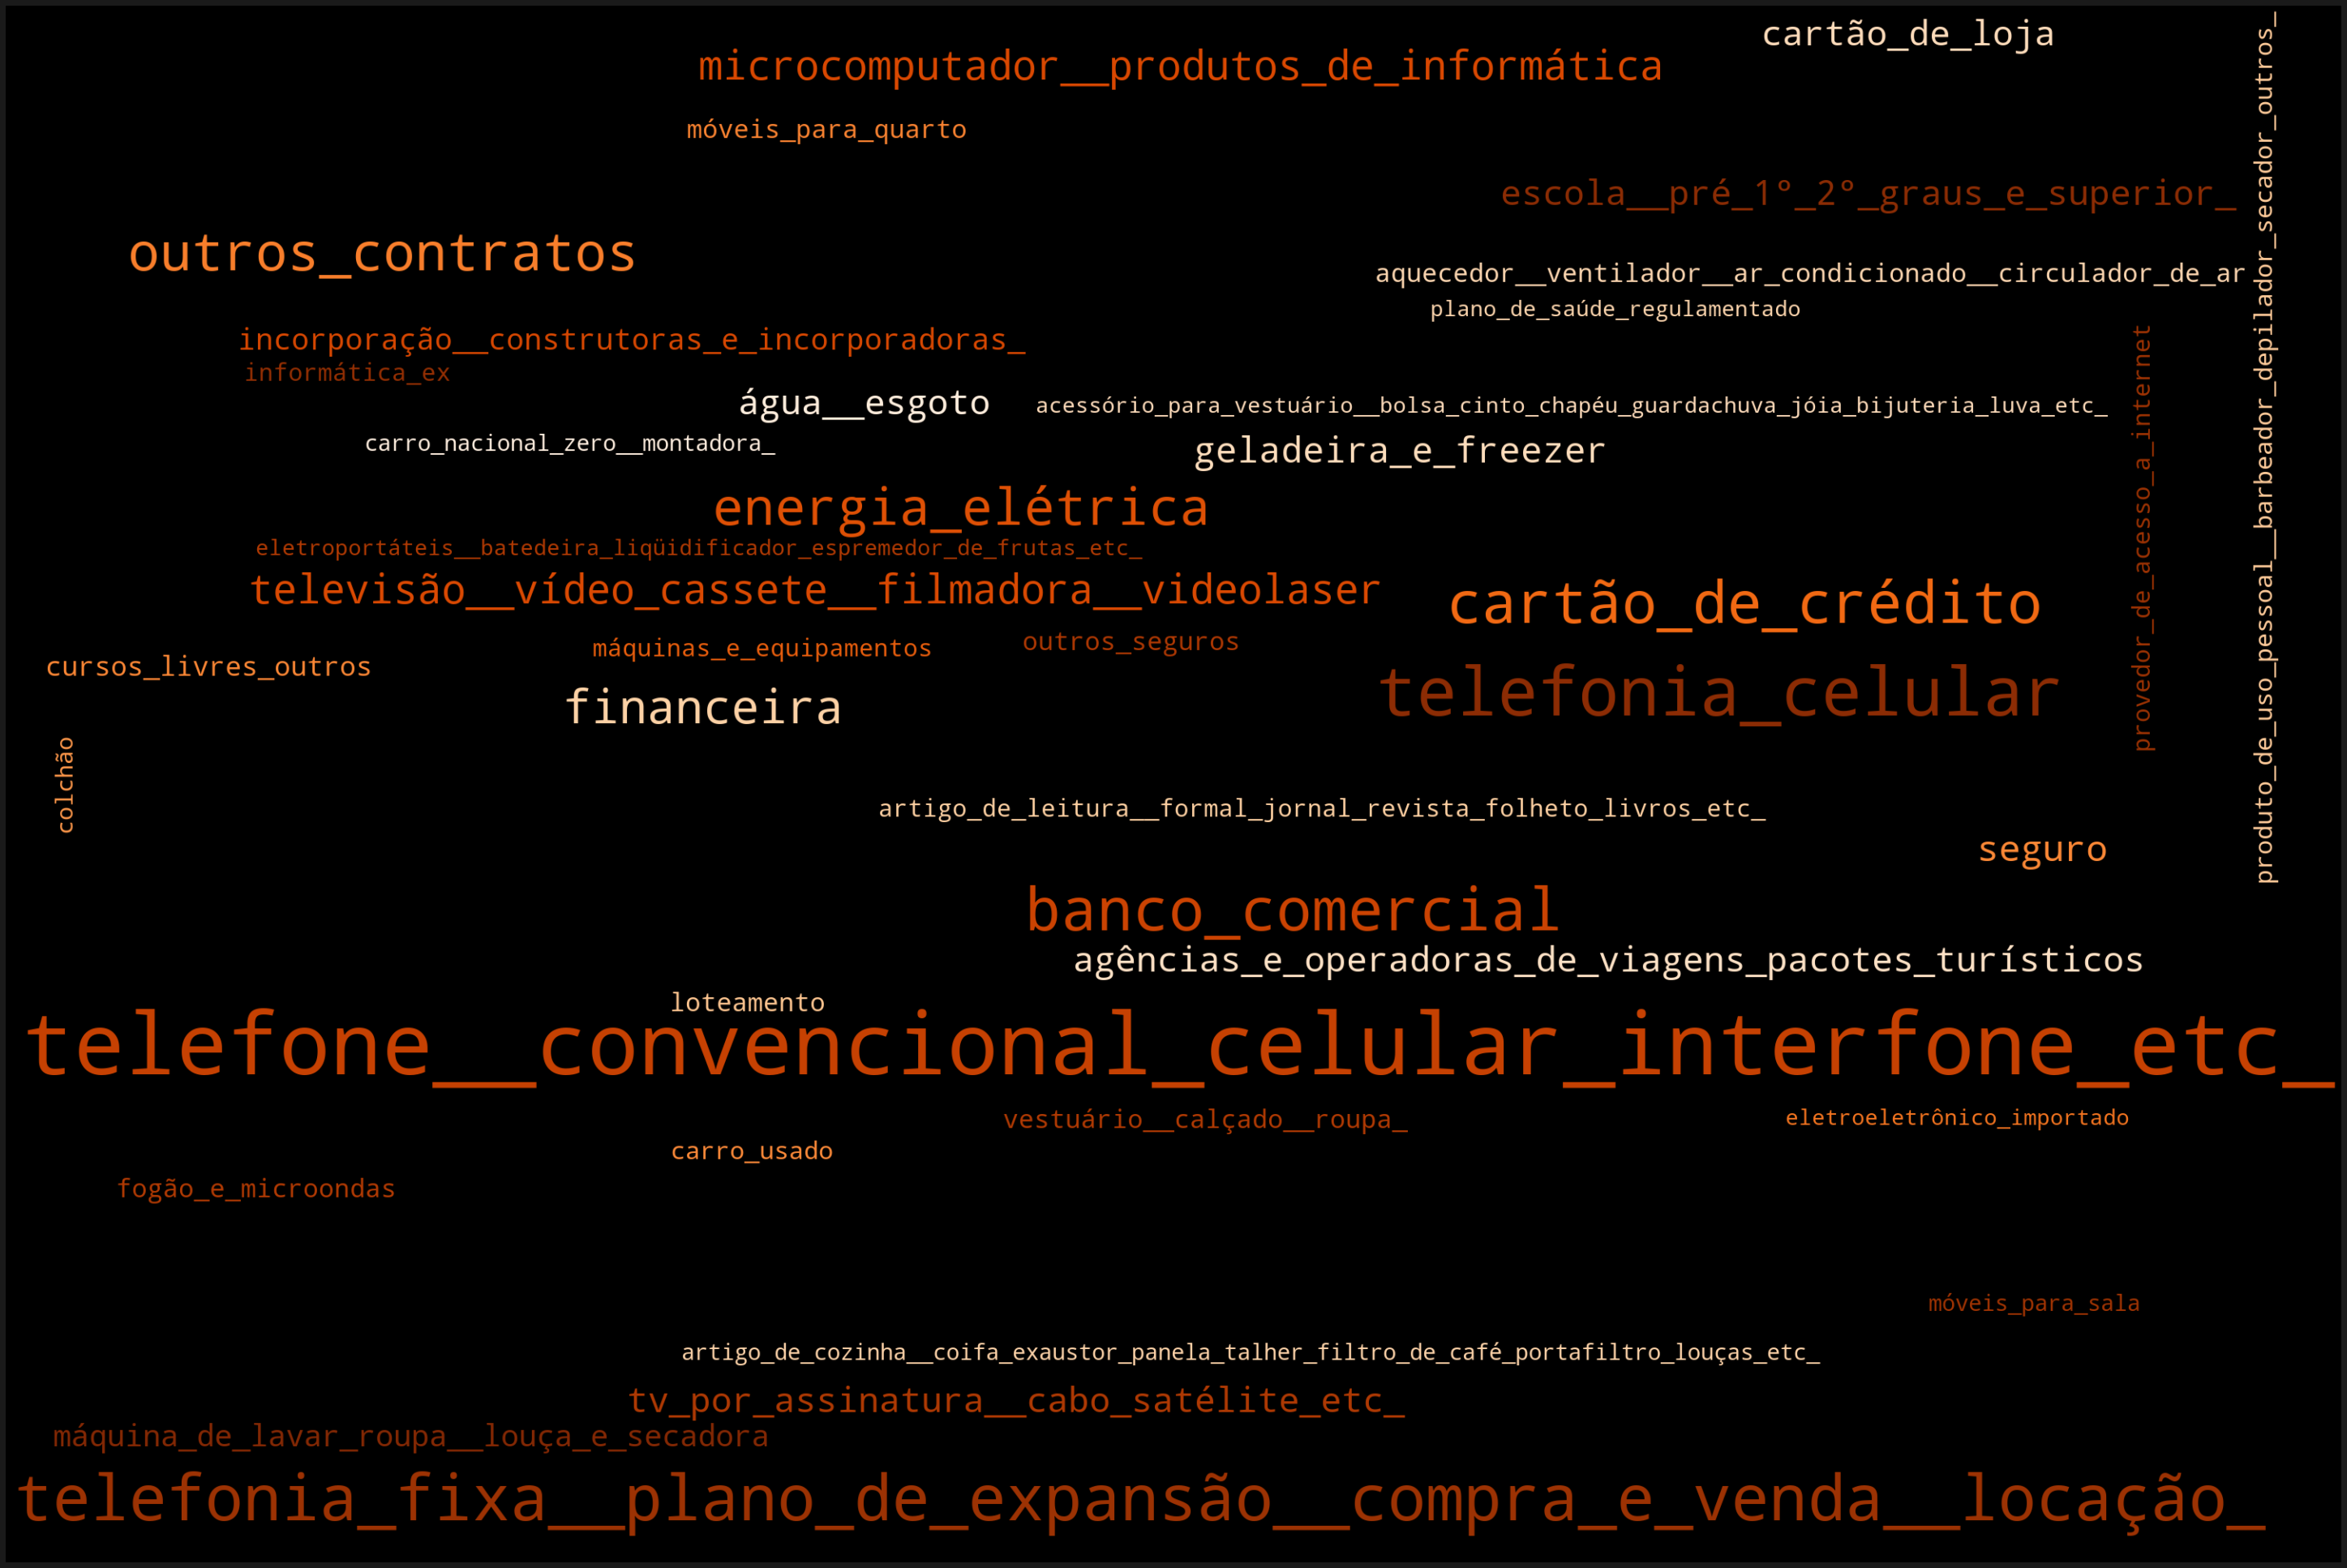

In [ ]:
# lista de stopword
stopwords = set(STOPWORDS)
stopwords.update(["de", "para", "etc", "você", "ao", "outros", "os" , "e" , "outro" ])

wordcloud_servico = WordCloud(stopwords=stopwords,background_color="black",
                             collocations=False,
                              colormap="Oranges_r",
                              width = 3000,
                              height = 2000,
                              max_font_size=1000,
                              max_words=40
                             ).generate(string_servico)
plt.figure(figsize = (40,30),
           facecolor = 'k',
           edgecolor = 'k')
plt.imshow(wordcloud_servico, interpolation='bilinear')
plt.axis('off')
plt.tight_layout(pad=0)
plt.savefig("servico_wordcloud.png")
plt.show()




